# Assignment: kNN classifier

## Objectives

The objectives of this assignment are:
1.	to learn to use the k-nearest neighbors algorithm for classification problems
2.	to learn to evaluate the performance of a classifier

## Setup

In the assignment, use the breast cancer dataset that is available at [https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Task

Fetch the diagnostic Wisconsin breast cancer dataset from the above link and study the associated description. The problem task consists of building a classifier using the kNN algorithm to predict the binary-valued target variable "Diagnosis" in the data. Also, the performance of the classifier must be investigated and reported.

Prepare a Jupyter notebook containing a full account of the problem treatment, conducted according to the CRISP-DM process model. The notebook should pay attention to the following issues:

- Investigate the contents of the dataset and include a brief description of its variables.

- Apply standardization to the numerical values of the input variables.

- Extract part of the data for testing in accordance with the hold-out validation technique.

- Train a binary classifier for predicting the cancer diagnosis (malignant / benign). Experiment with a few choices of the hyperparameter k, and report the findings.

- Test the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).

Construct your notebook to include sections for each of the six separate stages in the CRISP-DM model, with appropriate contents. Remember to draw conclusions and interpret your findings.



## Deliverables

Submit a GitHub permalink that points to the Jupyter notebook as instructed in Oma. The submitted notebook must contain the problem analysis written in accordance with the CRISP-DM process model, complete with Markdown blocks and comments that clearly explain what has been done.

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Standardize data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Extract part of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.Diagnosis, test_size=0.3, random_state=123)

# Create a kNN classifier
# n_neighbors parameter specifies the number of neighbors to use (k)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test set
y_pred_test = knn.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.3f}")

Accuracy of kNN classifier on the test set: 0.982


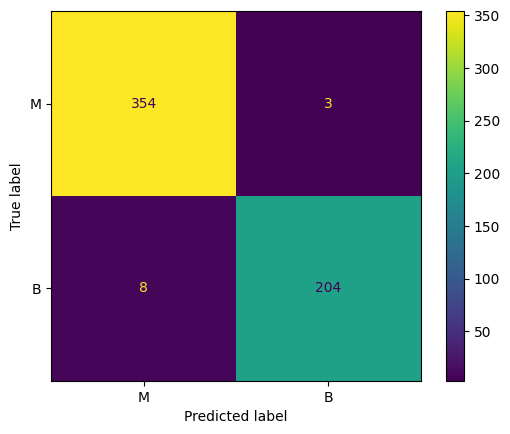

In [5]:
# Now, for the confusion matrix and plot
y_pred = knn.predict(X_scaled)  # Use the full scaled data to make predictions

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)  # Use 'y' directly

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=['M', 'B'])

# Plot confusion matrix
cmd.plot()